# 0. Introdução

Bem vindo ao meu notebook da primeira semana do Challenge de Data Science!

Aqui vamos tratar e analisar a base de dados fornecida pela Novexus, para isso vamos realizar algumas etapas como limpeza e organização dos dados, análise exploratória e criação de visualizações e gráficos para melhor compreensão, além de inserir as conclusões retiradas de cada gráfico.

A Novexus nos forneceu a base de dados e o dicionario das variaveis da base no S3 da Amazon:

Base de dados: https://challenge-data-science-3ed.s3.amazonaws.com/Telco-Customer-Churn.json 

Dicionario: https://challenge-data-science-3ed.s3.amazonaws.com/dicionario.md



# 1. Importação das bibliotecas

O primeiro passo para começar os tratamentos é instalar e importar as bibliotecas necessárias. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.express import box
import json
import requests

# 2. Importação dos dados

Podemos importar os dados de forma local a partir da base de dados baixada da seguinte forma:

In [2]:
# with open('../Dados/Telco-Customer-Churn.json', 'r') as f:
#     dados = json.load(f)

# dados = pd.json_normalize(dados)
# dados.head()

Também podemos importar a base de dados a partir do link disponibilizado da seguinte forma: 

In [3]:
url = 'https://challenge-data-science-3ed.s3.amazonaws.com/Telco-Customer-Churn.json'

# requisição da url
response = requests.get(url)

# transformando para objeto json
dados = response.json()

# transformando os dados em novas colunas 
# (o método a seguir mapeia cada chave do dicionário em uma nova coluna e os valores contidos se tornarão as linhas)
dados = pd.json_normalize(dados)

# mostrando os as 5 primeiras linhas
dados.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# 3. Tratando os dados 

## 3.1 Renomeando as colunas

In [4]:
novos_nomes_colunas = {
    "customerID": "customer_id",
    "Churn": "churn",
    "customer.gender": "customer_gender",
    "customer.SeniorCitizen": "customer_senior_citizen",
    "customer.Partner": "customer_partner",
    "customer.Dependents": "customer_dependents",
    "customer.tenure": "customer_tenure",
    "phone.PhoneService": "phone_service",
    "phone.MultipleLines": "multiple_lines",
    "internet.InternetService": "internet_service",
    "internet.OnlineSecurity": "online_security",
    "internet.OnlineBackup": "online_backup",
    "internet.DeviceProtection": "device_protection",
    "internet.TechSupport": "tech_support",
    "internet.StreamingTV": "streaming_tv",
    "internet.StreamingMovies": "streaming_movies",
    "account.Contract": "contract",
    "account.PaperlessBilling": "paperless_billing",
    "account.PaymentMethod": "payment_method",
    "account.Charges.Monthly": "monthly_charges",
    "account.Charges.Total": "total_charges"
}

dados = dados.rename(columns=novos_nomes_colunas)

## 3.2 Removendo linhas desnecessarias do DataFrame

#### Usando o comando .info() 

Ele nos mostra um resumo DataFrame, incluindo o número de linhas e colunas, os tipos de dados de cada coluna e o uso de memória. Também mostra o número de linhas não nulas para cada coluna. Isso informa quantas linhas no DataFrame têm um valor para essa coluna.

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              7267 non-null   object 
 1   churn                    7267 non-null   object 
 2   customer_gender          7267 non-null   object 
 3   customer_senior_citizen  7267 non-null   int64  
 4   customer_partner         7267 non-null   object 
 5   customer_dependents      7267 non-null   object 
 6   customer_tenure          7267 non-null   int64  
 7   phone_service            7267 non-null   object 
 8   multiple_lines           7267 non-null   object 
 9   internet_service         7267 non-null   object 
 10  online_security          7267 non-null   object 
 11  online_backup            7267 non-null   object 
 12  device_protection        7267 non-null   object 
 13  tech_support             7267 non-null   object 
 14  streaming_tv            

#### Analisando os valores unicos das colunas

In [6]:
for coluna in dados.columns:
    valores_unicos = dados[coluna].unique()
    print(coluna, ":", valores_unicos)

customer_id : ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
churn : ['No' 'Yes' '']
customer_gender : ['Female' 'Male']
customer_senior_citizen : [0 1]
customer_partner : ['Yes' 'No']
customer_dependents : ['Yes' 'No']
customer_tenure : [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
phone_service : ['Yes' 'No']
multiple_lines : ['No' 'Yes' 'No phone service']
internet_service : ['DSL' 'Fiber optic' 'No']
online_security : ['No' 'Yes' 'No internet service']
online_backup : ['Yes' 'No' 'No internet service']
device_protection : ['No' 'Yes' 'No internet service']
tech_support : ['Yes' 'No' 'No internet service']
streaming_tv : ['Yes' 'No' 'No internet service']
streaming_movies : ['No' 'Yes' 'No internet service']
contract : ['One year' 'Month-to-month' 'Two year']
paperless_b

#### Coluna churn

Podemos ver que a coluna de Churn possui valores não preenchidos, quando o esperado era apenas sim/não. Por isso, será necessário remover as linhas contendo esse valor. 

In [7]:
dados = dados[dados['churn'] != '']

dados.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

#### Coluna total_charges

Outra coluna que apresenta dados vazios (' ') é a Charges.Total. Essa coluna tem uma relação com Charges.Monthly e tenure.

A coluna tenure representa a quantidade de meses em que o cliente estava assinando o serviço. A coluna Charges.Monthly representa os gastos mensais do cliente e Charges.Total é a quantidade total de gastos, portanto seria uma multiplicação de Charges.Monthly por tenure.

Vamos selecionar todas as linhas onde o tenure = 0, ou seja, os clientes que assinaram o serviço por 0 meses, e mostrar os resultados para as colunas Charges.Total e Charges.Monthly.

Verificamos que quando tenure = 0, os dados de Charges.Total é vazio (' ').

Vamos agora selecionar os dados onde Charges.Total = ' ', mostrando os resultados para Charges.Monthly e tenure.

In [8]:
dados[dados['customer_tenure'] ==  0][['monthly_charges', 'customer_tenure', 'total_charges']]


,monthly_charges,customer_tenure,total_charges
975,56.05,0,
1775,20.00,0,
1955,61.90,0,
2075,19.70,0,
2232,20.25,0,
2308,25.35,0,
2930,73.35,0,
3134,25.75,0,
3203,52.55,0,
4169,80.85,0,


Percebe-se que todas as linhas de Charges.Total que estão vazias é porque o cliente não assinou nem por um mês. Temos que preencher esse valor com o mesmo valor que está presente em "Charges.Monthly" pois esse representa o total

In [9]:
dados["total_charges"] = dados["total_charges"].where(
        dados["total_charges"] != ' ', 
        dados["monthly_charges"]
    )

In [10]:
dados[dados['customer_tenure'] ==  0][['monthly_charges', 'customer_tenure', 'total_charges']]


,monthly_charges,customer_tenure,total_charges
975,56.05,0,56.05
1775,20.00,0,20.0
1955,61.90,0,61.9
2075,19.70,0,19.7
2232,20.25,0,20.25
2308,25.35,0,25.35
2930,73.35,0,73.35
3134,25.75,0,25.75
3203,52.55,0,52.55
4169,80.85,0,80.85


#### Resetando os indices

In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              7043 non-null   object 
 1   churn                    7043 non-null   object 
 2   customer_gender          7043 non-null   object 
 3   customer_senior_citizen  7043 non-null   int64  
 4   customer_partner         7043 non-null   object 
 5   customer_dependents      7043 non-null   object 
 6   customer_tenure          7043 non-null   int64  
 7   phone_service            7043 non-null   object 
 8   multiple_lines           7043 non-null   object 
 9   internet_service         7043 non-null   object 
 10  online_security          7043 non-null   object 
 11  online_backup            7043 non-null   object 
 12  device_protection        7043 non-null   object 
 13  tech_support             7043 non-null   object 
 14  streaming_tv            

Temos 7043 entrados porem os indices vão de 0 a 7266, ou seja, precisamos redefinir os indices

In [12]:
dados.reset_index(drop=True, inplace=True)

In [13]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              7043 non-null   object 
 1   churn                    7043 non-null   object 
 2   customer_gender          7043 non-null   object 
 3   customer_senior_citizen  7043 non-null   int64  
 4   customer_partner         7043 non-null   object 
 5   customer_dependents      7043 non-null   object 
 6   customer_tenure          7043 non-null   int64  
 7   phone_service            7043 non-null   object 
 8   multiple_lines           7043 non-null   object 
 9   internet_service         7043 non-null   object 
 10  online_security          7043 non-null   object 
 11  online_backup            7043 non-null   object 
 12  device_protection        7043 non-null   object 
 13  tech_support             7043 non-null   object 
 14  streaming_tv            

Por fim, vamos modificar o tipo da variável total_charges para float, uma vez que o tipo estava como object.


In [14]:
dados['total_charges'] = dados['total_charges'].astype('float64')

In [15]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              7043 non-null   object 
 1   churn                    7043 non-null   object 
 2   customer_gender          7043 non-null   object 
 3   customer_senior_citizen  7043 non-null   int64  
 4   customer_partner         7043 non-null   object 
 5   customer_dependents      7043 non-null   object 
 6   customer_tenure          7043 non-null   int64  
 7   phone_service            7043 non-null   object 
 8   multiple_lines           7043 non-null   object 
 9   internet_service         7043 non-null   object 
 10  online_security          7043 non-null   object 
 11  online_backup            7043 non-null   object 
 12  device_protection        7043 non-null   object 
 13  tech_support             7043 non-null   object 
 14  streaming_tv            

# 4. Análise exploratória dos dados


Para começar a analisar, vamos utilizar o método .describe() para entender alguns métodos estatísticos que temos dentro da base de dados.

O método describe() fornece as informações sobre:

* count - Conta a quantidade de número de valores não vazios. Com esses valores podemos entender melhor o tamanho da amostra.

* mean - O valor médio, em média aritmética. Como ele faz uma média aritmética nem sempre mostra a realidade da maior parte dos casos do banco de dados.

* std - O desvio padrão. É a medida de como os dados se dispersam em relação à média, ou seja, o quanto eles estão espalhados.

* min e max - Valores que auxiliam a identificar a amplitude da amostra, entre o valor mínimo e máximo.

* quartis - Valores que nos mostram de que forma os dados foram distribuídos, por exemplo em 50% é a mediana e metade dos valores são inferiores a X valor, a outra metade é superior àquele valor.

In [16]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_senior_citizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
customer_tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
total_charges,7043.0,2279.798992,2266.730170,18.80,398.55,1394.55,3786.60,8684.80


Podemos observar que apenas 4 colunas podem ser analisadas com o método .describe(). Isso por que a maior parte dos dados que temos é object, e o método não consegue trabalhar com variáveis categóricas a não ser que seja passado um parâmetro permitindo essa inclusão, porém algumas das nossas análises do método .describe() podem ser perdidas.

In [17]:
# Para analisar as features que são categóricas, podemos usar include

dados.describe(include=[object]).T

,count,unique,top,freq
customer_id,7043,7043,0002-ORFBO,1
churn,7043,2,No,5174
customer_gender,7043,2,Male,3555
customer_partner,7043,2,No,3641
customer_dependents,7043,2,No,4933
phone_service,7043,2,Yes,6361
multiple_lines,7043,3,No,3390
internet_service,7043,3,Fiber optic,3096
online_security,7043,3,No,3498
online_backup,7043,3,No,3088


Mesmo com esses valores, ainda fica complicado de obtermos respostas e de passarmos algo concreto para o time do comercial avaliar, principalmente para formular alguma hipótese sobre o churn, por isso agora vamos passar para a parte gráfica.



# 5. Análises gráficas

## 5.1 Distribuição do Churn das variaveis categoricas

In [18]:
def plot_countplot(dados, x, titulo, label_x, hue=None, small: bool = False, figsize: tuple = (8, 5)):
    
    plt.figure(figsize = figsize)
    custom_params = {"axes.spines.right": False, "axes.spines.top": False,
                     "axes.spines.left": False, "axes.spines.bottom": False}

    sns.set_theme(style="ticks", rc=custom_params)
    ax = sns.countplot(x=x, hue=hue, data=dados, palette='viridis')

    ax.get_yaxis().set_visible(False)

    plt.title(titulo, fontsize=22, loc='left', pad=20, fontweight="bold")
    plt.xlabel(label_x, fontsize=17)
    plt.xticks(fontsize=15)

    for container in ax.containers:
        ax.bar_label(container, fontsize=15)

    plt.show()
    


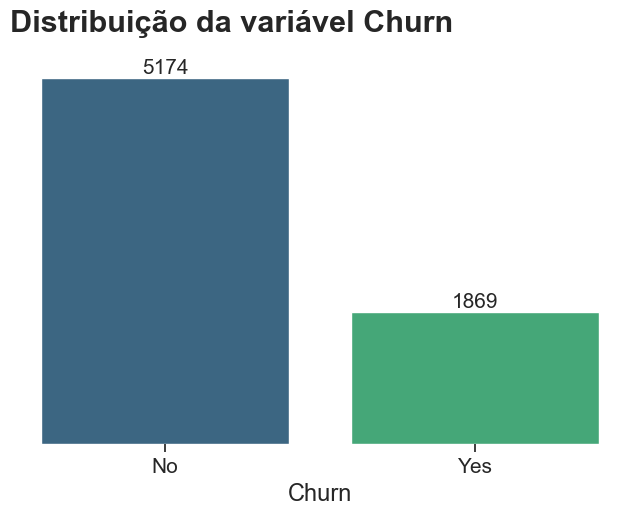

In [19]:
plot_countplot(dados=dados, 
               x='churn', 
               titulo="Distribuição da variável Churn",
               label_x='Churn'
    )

Vemos que o Churn esta desbalanciado, isso devera ser tratado mais a frente.

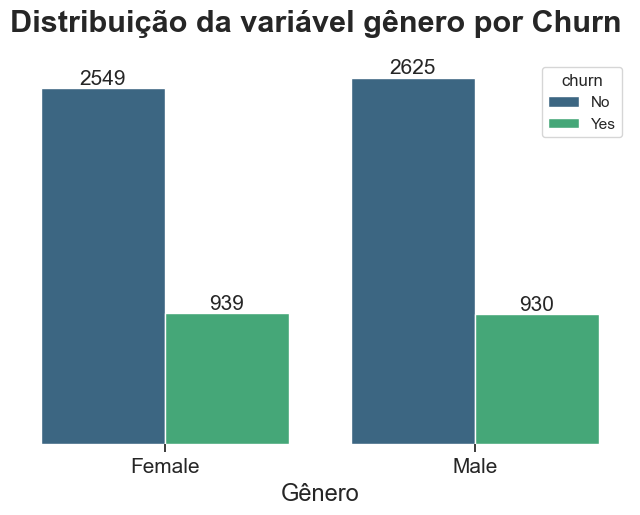

In [20]:
# Plotando o gráfico de Gênero

plot_countplot(dados=dados, 
               x='customer_gender', 
               titulo="Distribuição da variável gênero por Churn",
               label_x='Gênero',
               hue='churn'
    )

Podemos identificar que a variável "gender" **não possui impacto no churn**, uma vez que a proporção de pessoas que cancelaram o serviço entre os genêros é a mesma.

Vamos plotar os gráficos para os serviços de internet:

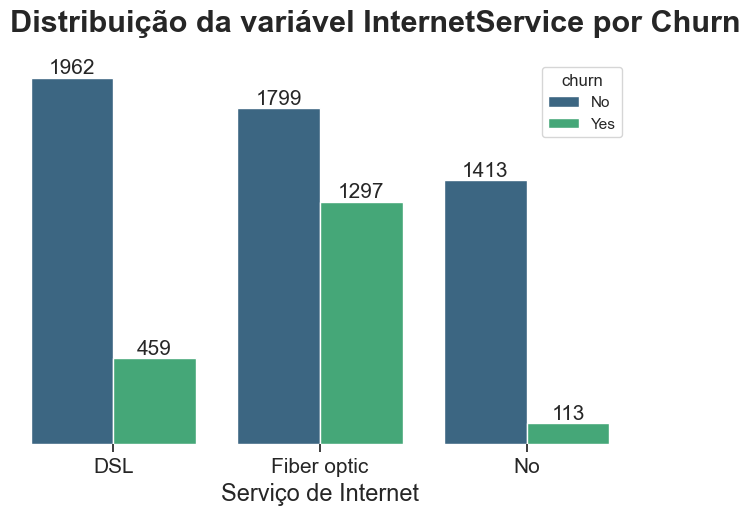

In [21]:
# Plotando o gráfico do serviço de internet

plot_countplot(dados=dados, 
               x='internet_service', 
               titulo="Distribuição da variável InternetService por Churn",
               label_x='Serviço de Internet', 
               hue='churn'
    )

Percebe-se que os clientes que utilizam fibra ótica como serviço de internet possuem uma taxa de churn proporcionalmente maior que os demais. A empresa poderia identificar quais problemas que está acontecendo com o serviço de fibra ótica e melhorá-lo ou também poderia oferecer mais o tipo de serviço DSL já que possui uma evasão menor.



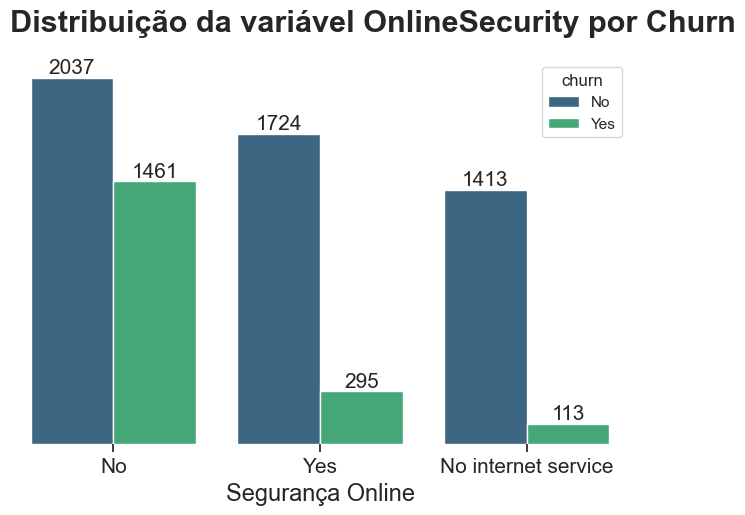

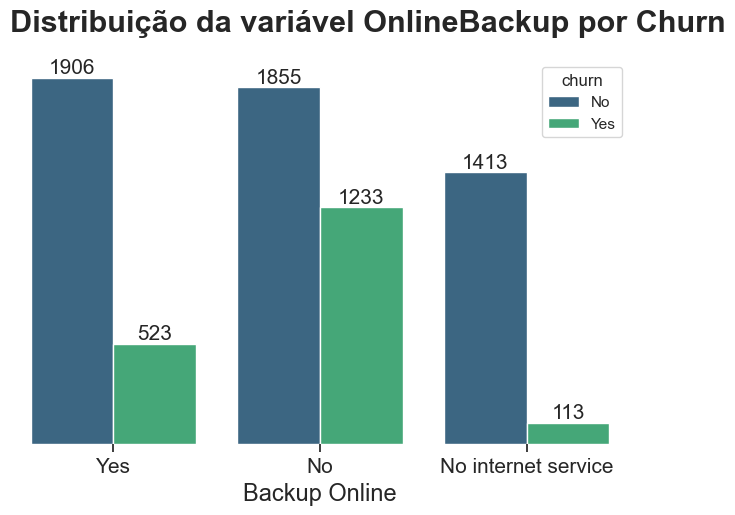

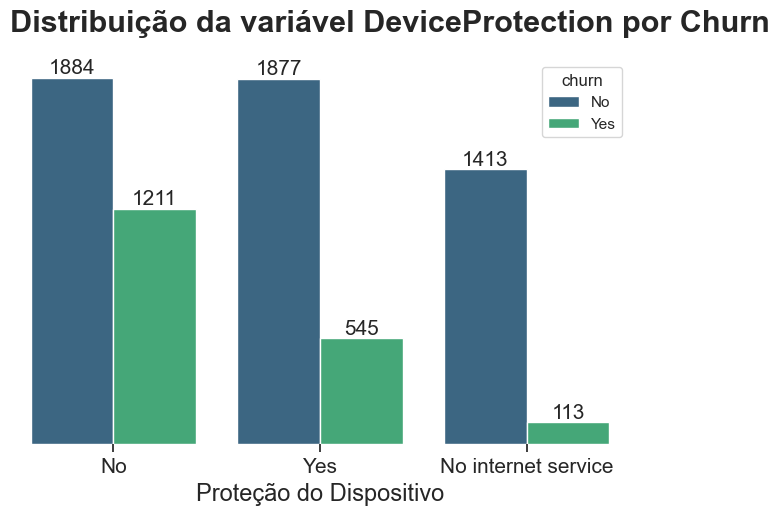

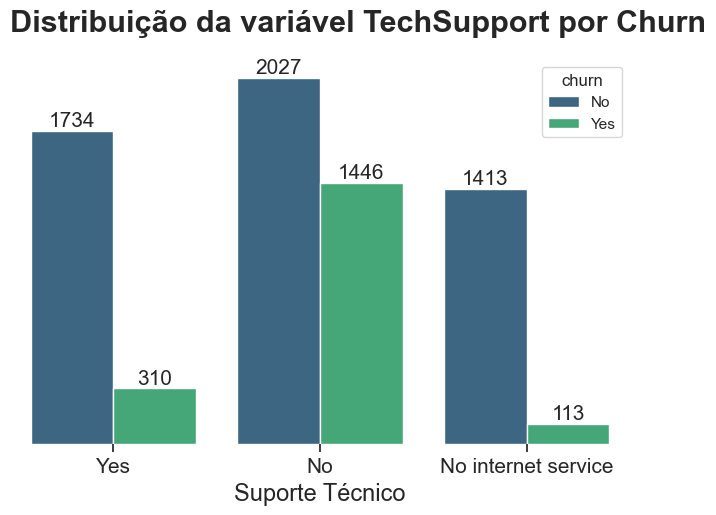

In [22]:
# Plotando o gráfico referente a se o cliente possui segurança online ou não

plot_countplot(dados=dados, 
               x='online_security', 
               titulo="Distribuição da variável OnlineSecurity por Churn",
               label_x='Segurança Online', 
               hue='churn'
    ) 

# Plotando o gráfico referente a se o cliente possui ou não um backup online

plot_countplot(dados=dados, 
               x='online_backup', 
               titulo="Distribuição da variável OnlineBackup por Churn",
               label_x='Backup Online',
               hue='churn'
    )



# Plotando o gráfico referente a se o cliente possui proteção do dispositivo ou não

plot_countplot(dados=dados, 
               x='device_protection', 
               titulo="Distribuição da variável DeviceProtection por Churn",
               label_x='Proteção do Dispositivo', 
               hue='churn'
    ) 


# Plotando o gráfico referente a se o cliente tem suporte técnico ou não.

plot_countplot(dados=dados, 
               x='tech_support', 
               titulo="Distribuição da variável TechSupport por Churn",
               label_x='Suporte Técnico',
               hue='churn'
    ) 


Dos gráficos acima vemos que os clientes que não assinam o serviço de segurança online, que não possuem backup online, que não possuem a proteção do dispositivo ou que não possuem suporte técnico tendem a deixar de utilizar os serviços. Oferecer esses serviços seria uma uma boa opção para reduzir a taxa de cancelamentos.

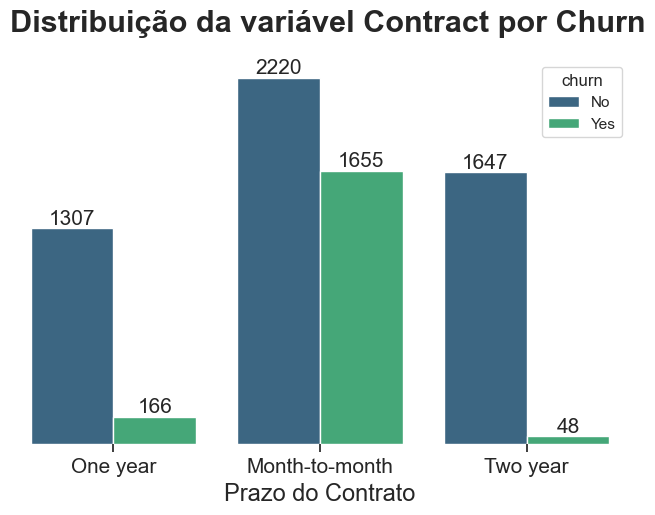

In [23]:
# Plotando o gráfico referente ao prazo do contrato do cliente

plot_countplot(dados=dados, 
               x='contract', 
               titulo="Distribuição da variável Contract por Churn",
               label_x='Prazo do Contrato', 
               hue='churn',
    ) 

Pelo gráfico acima temos que os clientes que possuem um contrato mensal são os que tendem a deixar de utilizar os serviços da empresa. Oferecer um serviço de contrato anual ou de dois anos é uma boa opção para reduzir a taxa de cancelamentos.

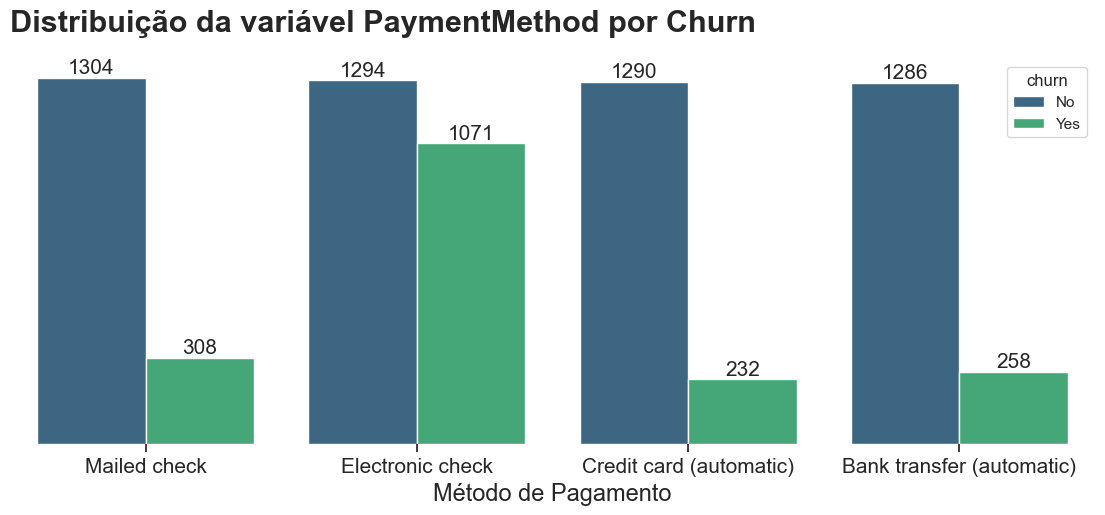

In [24]:
# Plotando o gráfico referente ao método de pagamento do cliente

plot_countplot(dados=dados, 
               x='payment_method', 
               titulo="Distribuição da variável PaymentMethod por Churn",
               label_x='Método de Pagamento', 
               hue='churn', 
               figsize=(14, 5)
    ) 

Percebemos que as pessoas utilizam o método de pagamento "Eletronic check" tendem a cancelar os serviços da empresa. Direcionar os clientes para outro método de pagamento é uma boa opção para reduzir a taxa de cancelamentos, como por exemplo cartão de crédito que é onde tem a menor taxa de cancelamento.

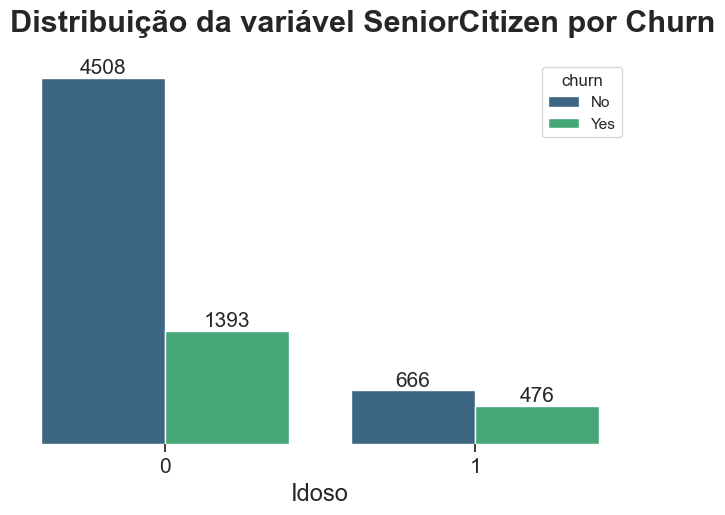

In [25]:
# Plotando o gráfico a se o cliente é idoso ou não por churn.

plot_countplot(dados=dados, 
               x='customer_senior_citizen', 
               titulo="Distribuição da variável SeniorCitizen por Churn",
               label_x='Idoso', 
               hue='churn'
    ) 

Embora a quantidade de clientes idosos ser bem menor, a proporção de clientes que cancelaram o serviço entre os idosos é maior que a de clientes que não são idosos. Entender os motivos que estão levando a essa taxa de cancelamento entre os idosos e adotar medidas para melhorar o serviço para esses clientes é uma boa opção para reduzir a taxa de cancelamento.


## 5.2 Analisando o Churn das variaveis númericas

Para analisar as variáveis que são numéricas vamos utilizar o Boxplot, que é um gráfico que mostra a distribuição de dados por meio de quartis.

In [26]:
# Imprimindo boxplot com o plotly

# for col in ['customer_tenure', 'monthly_charges', 'total_charges']:
#     fig = box(dados, x=col, color='churn', orientation='h', title=col)
#     fig.show()

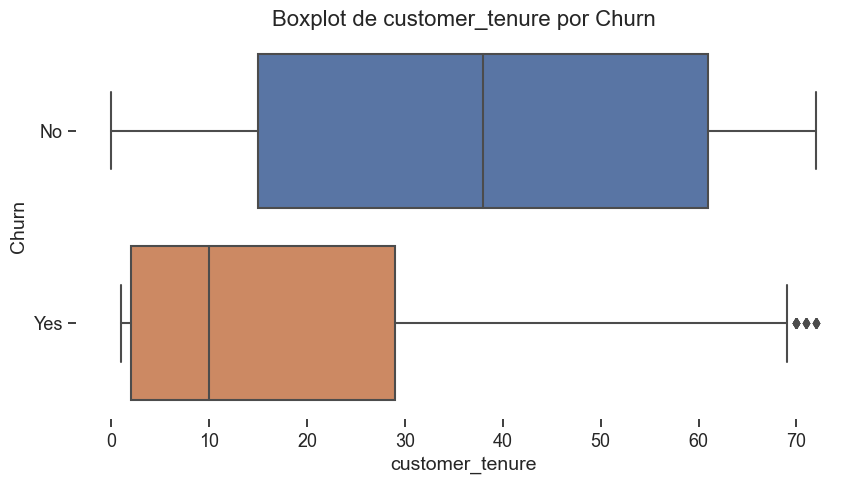

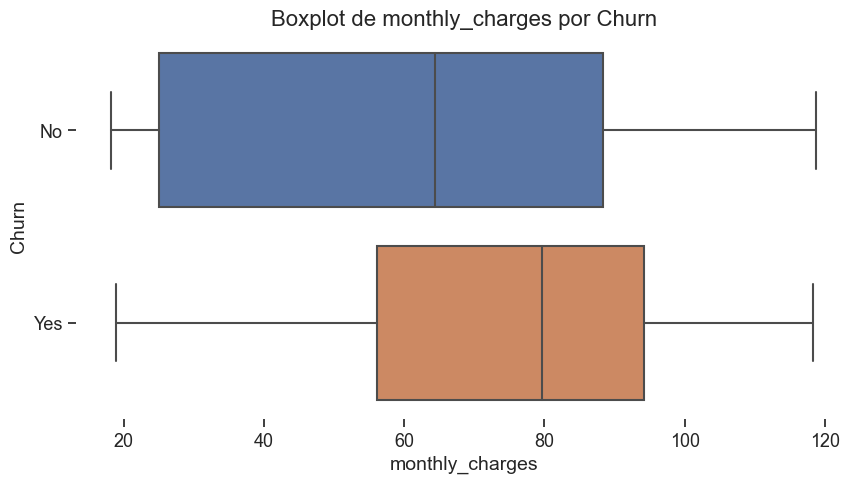

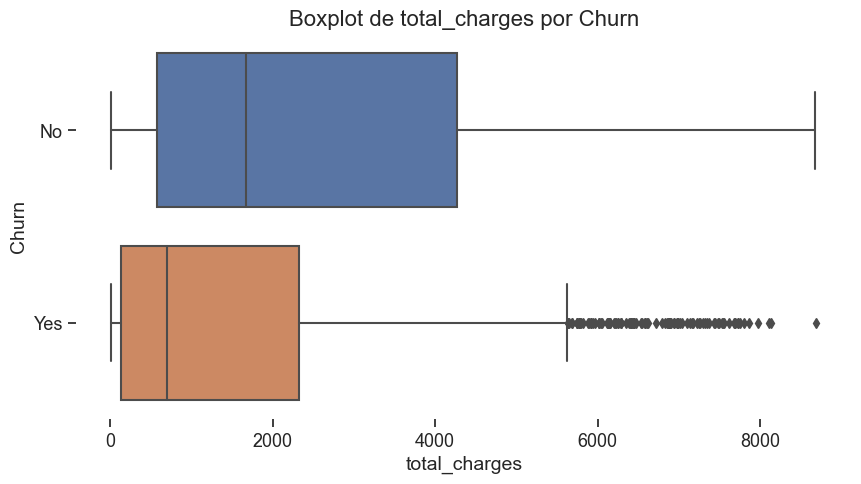

In [27]:
# Utilizando a biblioteca seaborn

for col in ['customer_tenure', 'monthly_charges', 'total_charges']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=col, y='churn', data=dados)
    plt.title(f"Boxplot de {col} por Churn", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Churn', fontsize=14)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()

Analisando a feature "tenure", que representa o tempo de contrato do cliente, percebe-se que clientes que estão a mais tempo tendem a continuar a utilizar o serviço.

Para a feature "Charges.Monthly", percebe-se que os clientes que adquirem serviços mais baratos tendem a continuar utilizando o serviço.

## 5.3 Análise de correlação

Vamos analisar as features "tenure" e "Charges.Monthly" e "Charges.Total" que aparentemente estão correlacionadas.

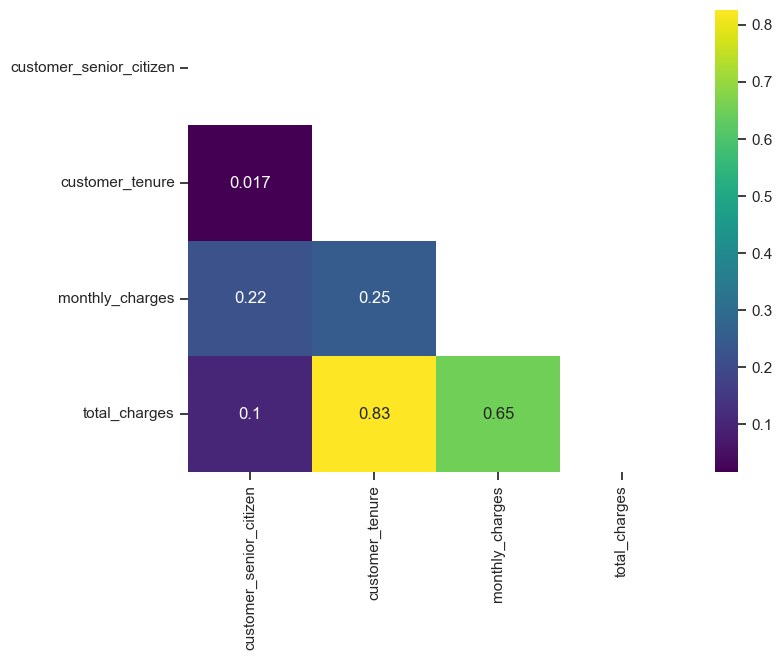

In [28]:
corr = dados.corr(numeric_only=True)


mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8, 6))

ax = sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,
            cmap='viridis',
            mask=mask)


As features "tenure" e "Charges.Total" possuem uma correlação forte, o que significa que a medida que uma aumenta a outra aumenta também. Não é muito interessante trabalharmos com duas features correlacionadas pois isso quer dizer que ambas as colunas transmitem a mesma informação, portanto vamos remover a feature "Charges.Total" posteriormente.

## Exportando arquivo

In [35]:
dados.to_csv('dados_etapa1.csv', index=False)
